In [1]:
from google.colab import drive
drive.mount("/content/drive")
!ls

Mounted at /content/drive
drive  sample_data


In [39]:
import os 
import numpy as  np
import pandas as pd
path="drive/MyDrive/Dong-Data"

In [40]:
def replaceNaNWithMean(data,col):
  #tinh mean cua rieng cot col
  mean=np.mean(data[col])
  #thay gia tri NaN cua cot col bang mean cua cot do
  data[col].fillna(mean, inplace=True)

In [41]:
ColNames=["logR&D", 'logPatents', 'logCitsum', 'logSumnew']

In [42]:
RowNames=["Number of Qualifications",'Time in Role','Director Network Size',"InterlockingTies"]

In [44]:
for i in range(1):
  data=pd.read_csv(path+"/FinalExtract"+str(i)+".csv",  encoding = 'unicode_escape')
  print(data.columns)
  for col in cols:
    replaceNaNWithMean(data,col)


  

Index(['Compustat GVKEY', 'Company Name_x', 'Director Network Size',
       'Time in Role', 'TICKER', 'InterlockingTies', 'Time on Board',
       'Total Number of Other Boards to Date', 'Age (Yrs)',
       'Number of Qualifications', 'Total Directors on the Board',
       'SIC Codes (Primary Code Only)', 'Total Assets',
       'Long-Term Debt [CY 1990] ($USDmm, Historical rate)',
       'Total Common Equity', 'Market Capitalization',
       'R&D Exp. [CY 1990] ($USDmm, Historical rate)', 'YEAR', 'size',
       'Growth', 'Sector', 'FIRM ID', 'GVKEY', 'GVKEY_YEAR', 'TICKER_x',
       'CUSIP', 'SIC', 'sumnew', 'new', 'year', 'permno', 'patents', 'citsum',
       'PERMNO', 'TICKER_y', 'leverage', 'R&D', 'logR&D', 'logSumnew',
       'logPatents', 'logCitsum'],
      dtype='object')


In [46]:
d={}
for col in ColNames:
  sta=data[col].describe()
  print(col)
  temp=[]
  for i in range(4,8):
    temp.append(sta[i])
  print(temp)
  d[col]=temp

logR&D
[0.0, 0.0, 0.0, 0.6666880182101332]
logPatents
[1.6094379124341005, 2.8332133440562166, 4.204692619390967, 8.923058219545727]
logCitsum
[1.0986122886681098, 3.1354942159291497, 4.8828019225863715, 10.355868052653099]
logSumnew
[0.0, 0.0, 0.6931471805599453, 3.737669618283368]


In [49]:
from scipy.stats import ttest_ind
f=open(path+"/Table6.csv","w")
f.write(",Quartile1,Quartile2,Quartile3,Quartile4,Quartile(4-1),t-value\n")
for col in d.keys(): #logR&D, logPatents, logCitsum, logSumnew
  f.write("Panel A: "+col+",,,,,,\n")
  quartiles=d.get(col)
  for row in RowNames: #"Number of Qualifications",'Time in Role','Director Network Size',"InterlockingTies"
    f.write(row+",")
    q1=q4=0
    d1=d4=pd.DataFrame()
    for i in range(len(quartiles)): #0.25, 0.5, 0.75, max
      filt=data[data[col]==quartiles[i]]
      value=np.mean(filt[row])
      f.write(str(value)+",")
      if i==0:
        q1=value
        d1=filt[row]
      if i==3:
        q4=value
        d1=filt[row]
    f.write(str(q4-q1)+",")
    t_value=ttest_ind(d1,d4)
    f.write(str(t_value)+"\n")
f.close()




In [ ]:
for col1 in cols:
  for col2 in cols:
    print("correlation between ",col1," and ",col2)
    correlation = data[col1].corr(data[col2]) 
    print(correlation)

In [ ]:
rho = data.corr()
pval = data.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

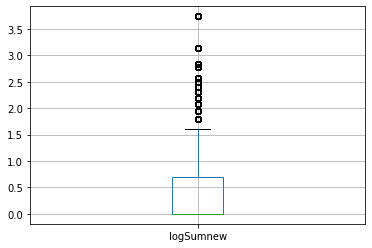

In [ ]:
boxplot = data.boxplot(column="logSumnew")